# PASCAL VOC (2012)

> ## Pattern Analysis, Statistical Modeling and Computational Learning

> ### Visual Object Classes Challenge 2012

* 20 Object Classes

 - http://host.robots.ox.ac.uk/pascal/VOC/voc2012/

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# I. PASCAL VOC 2012 Dataset

> ## 1) Download Dataset

* 약 1분

In [ ]:
%%time 

!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
!tar -xf VOCtrainval_11-May-2012.tar

--2023-04-07 01:23:59--  http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/x-tar]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G  29.1MB/s    in 67s     

2023-04-07 01:25:06 (28.6 MB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]

CPU times: user 659 ms, sys: 106 ms, total: 764 ms
Wall time: 1min 15s


* Check Directories

In [ ]:
!ls /content/VOCdevkit/VOC2012 -l

total 1304
drwxrwxrwx 2 root root 561152 May 11  2012 Annotations
drwxrwxrwx 6 root root   4096 May 11  2012 ImageSets
drwxrwxrwx 2 root root 544768 May 11  2012 JPEGImages
drwxrwxrwx 2 root root 110592 May 11  2012 SegmentationClass
drwxrwxrwx 2 root root 110592 May 11  2012 SegmentationObject


* JPEG Files

In [ ]:
!ls /content/VOCdevkit/VOC2012/JPEGImages -l | head -n 9

total 1911192
-rwxrwxrwx 1 root root 145493 Jan  9  2007 2007_000027.jpg
-rwxrwxrwx 1 root root  54757 Jan  9  2007 2007_000032.jpg
-rwxrwxrwx 1 root root  71205 Jan  9  2007 2007_000033.jpg
-rwxrwxrwx 1 root root  64668 Jan  9  2007 2007_000039.jpg
-rwxrwxrwx 1 root root  82847 Jan  9  2007 2007_000042.jpg
-rwxrwxrwx 1 root root  73156 Jan  9  2007 2007_000061.jpg
-rwxrwxrwx 1 root root 126171 Jan  9  2007 2007_000063.jpg
-rwxrwxrwx 1 root root 101159 Jan  9  2007 2007_000068.jpg


* Annotation Files

In [ ]:
!ls /content/VOCdevkit/VOC2012/Annotations -l | head -n 9

total 68892
-rwxrwxrwx 1 root root  1151 May 11  2012 2007_000027.xml
-rwxrwxrwx 1 root root  1213 May 11  2012 2007_000032.xml
-rwxrwxrwx 1 root root  1002 May 11  2012 2007_000033.xml
-rwxrwxrwx 1 root root   553 May 11  2012 2007_000039.xml
-rwxrwxrwx 1 root root   776 May 11  2012 2007_000042.xml
-rwxrwxrwx 1 root root   773 May 11  2012 2007_000061.xml
-rwxrwxrwx 1 root root   771 May 11  2012 2007_000063.xml
-rwxrwxrwx 1 root root   545 May 11  2012 2007_000068.xml


> ## 2) Image File 

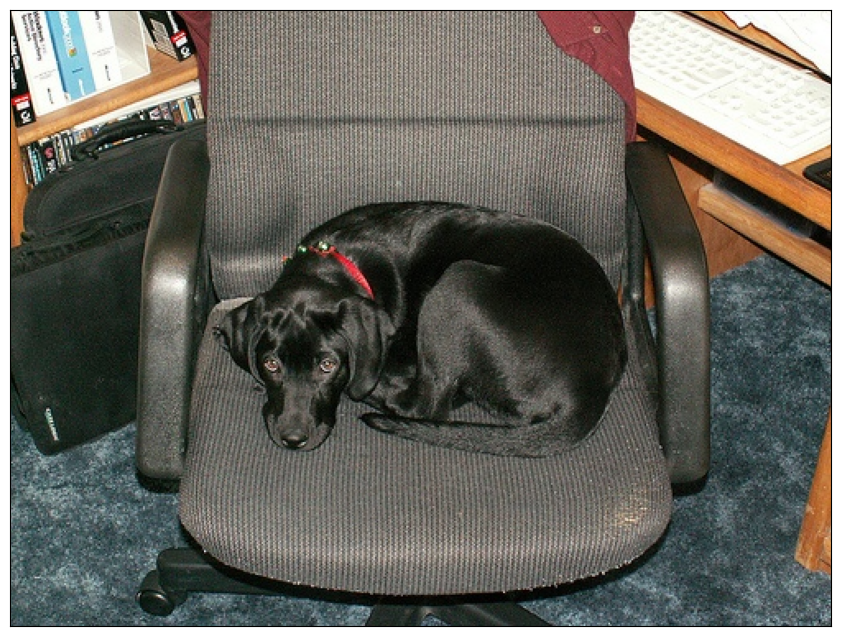

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2007_000063.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (12, 8))
plt.imshow(img_rgb)
plt.xticks([])
plt.yticks([])
plt.show()

>## 3) Annotation File

In [ ]:
!cat /content/VOCdevkit/VOC2012/Annotations/2007_000063.xml

<annotation>
	<folder>VOC2012</folder>
	<filename>2007_000063.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
	</source>
	<size>
		<width>500</width>
		<height>375</height>
		<depth>3</depth>
	</size>
	<segmented>1</segmented>
	<object>
		<name>dog</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>123</xmin>
			<ymin>115</ymin>
			<xmax>379</xmax>
			<ymax>275</ymax>
		</bndbox>
	</object>
	<object>
		<name>chair</name>
		<pose>Frontal</pose>
		<truncated>1</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>75</xmin>
			<ymin>1</ymin>
			<xmax>428</xmax>
			<ymax>375</ymax>
		</bndbox>
	</object>
</annotation>


# II. Segmentation Dataset

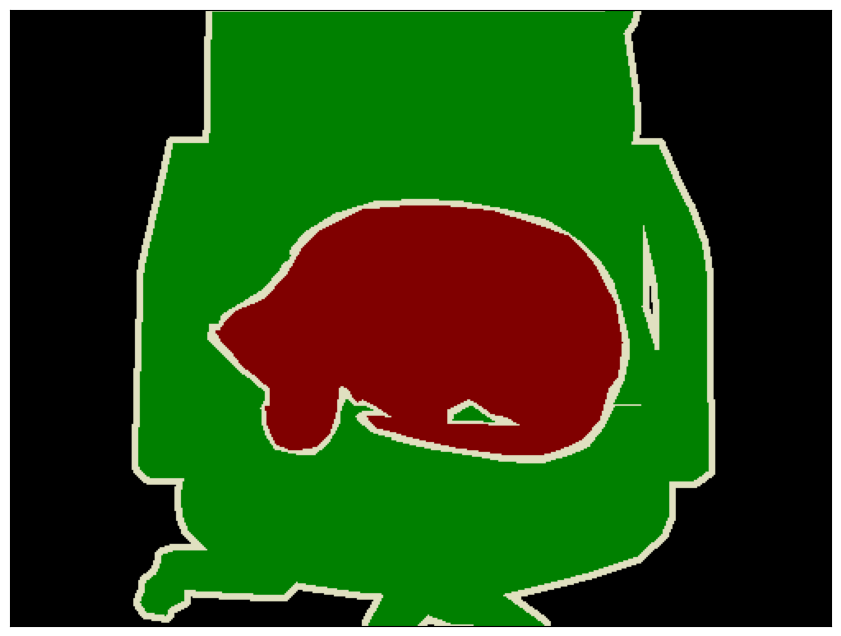

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/VOCdevkit/VOC2012/SegmentationObject/2007_000063.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (12, 8))
plt.imshow(img_rgb)
plt.xticks([])
plt.yticks([])
plt.show()

# III. Annotation Information

> ## 1) os.path.join( )

In [ ]:
import os

VOC_ROOT = '/content/VOCdevkit/VOC2012/'
ann_DIR = os.path.join(VOC_ROOT, 'Annotations')
img_DIR = os.path.join(VOC_ROOT, 'JPEGImages')

XML_Files = os.listdir(ann_DIR)                       

len(XML_Files)

17125

> ## 2) Annotation Parsing

* XML Package - ElementTree
 - !pip install lxml

In [ ]:
import os
import xml.etree.ElementTree as ET

XML_Files = os.path.join(ann_DIR, '2007_000063.xml')

# XML Parsing
tree = ET.parse(XML_Files)
root = tree.getroot()

# <filename>
image_name = root.find('filename').text
full_image_name = os.path.join(img_DIR, image_name)

# <size>
#   <width>
#   <height>
image_size = root.find('size')
image_width = int(image_size.find('width').text)
image_height = int(image_size.find('height').text)

# <object>
#    <bndbox>
#        <xmin>
#        <ymin>
#        <xmax>
#        <ymax>
#    <name>
objects_list = []
for obj in root.findall('object'):
    
    xmlbox = obj.find('bndbox')
    
    x1 = int(xmlbox.find('xmin').text)
    y1 = int(xmlbox.find('ymin').text)
    x2 = int(xmlbox.find('xmax').text)
    y2 = int(xmlbox.find('ymax').text)
    
    bndbox_pos = (x1, y1, x2, y2)
    class_name = obj.find('name').text
    object_dict = {'class_name': class_name, 'bndbox_pos':bndbox_pos}
    objects_list.append(object_dict)

for object in objects_list:
    print(object)

{'class_name': 'dog', 'bndbox_pos': (123, 115, 379, 275)}
{'class_name': 'chair', 'bndbox_pos': (75, 1, 428, 375)}


>## 2) Bounding Box Visualization

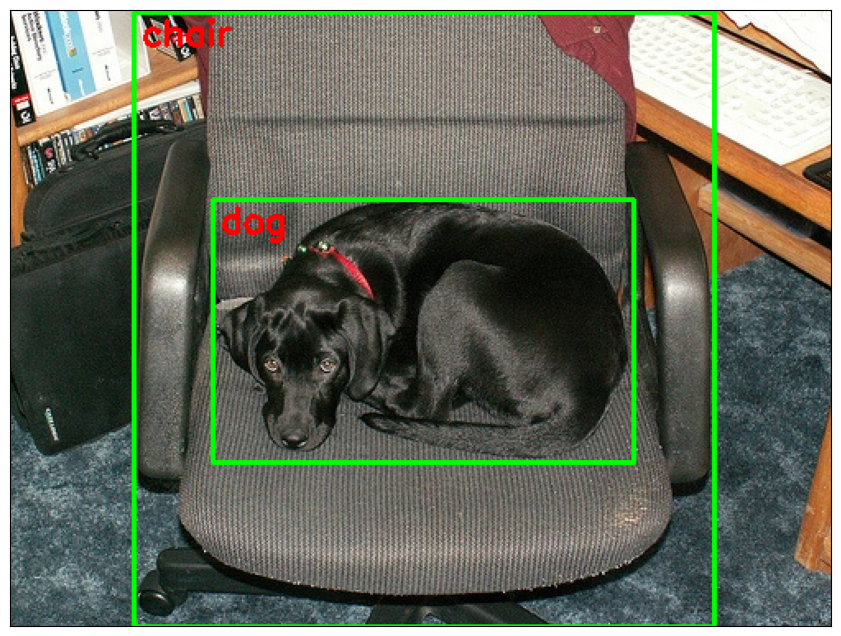

In [ ]:
import cv2
import os
import xml.etree.ElementTree as ET

xml_file = os.path.join(ann_DIR, '2007_000063.xml')

tree = ET.parse(xml_file)
root = tree.getroot()

image_name = root.find('filename').text
full_image_name = os.path.join(img_DIR, image_name)

img = cv2.imread(full_image_name)

draw_img = img.copy()

# Get all Objects
objects_list = []
for obj in root.findall('object'):
    xmlbox = obj.find('bndbox')
    
    left = int(xmlbox.find('xmin').text)
    top = int(xmlbox.find('ymin').text)
    right = int(xmlbox.find('xmax').text)
    bottom = int(xmlbox.find('ymax').text)
    
    class_name = obj.find('name').text
    
    # Create Green_Box 
    cv2.rectangle(draw_img, (left, top), (right, bottom), color = (0, 255, 0), thickness = 2)
    # Write Red_Text
    cv2.putText(draw_img, class_name, (left + 5, top + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), thickness = 2)

# BGR to RGB
img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (12, 8))
plt.imshow(img_rgb)
plt.xticks([])
plt.yticks([])
plt.show()

# 
# 
# 
# The End
# 
# 
# 